In [190]:
import matplotlib.pyplot as plt
import numpy as np
import csv


In [191]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
plt.rcParams.update({"figure.figsize": (8, 6),
                     "figure.facecolor": "white",
                     'axes.titlesize': 'x-large',
                                         'axes.labelsize': 'large',
                     'xtick.labelsize': 'medium',
                     'ytick.labelsize': 'medium', "axes.grid": True,
                     "grid.linewidth": 0.5, "grid.alpha": 0.3})


Load data from data.csv file.


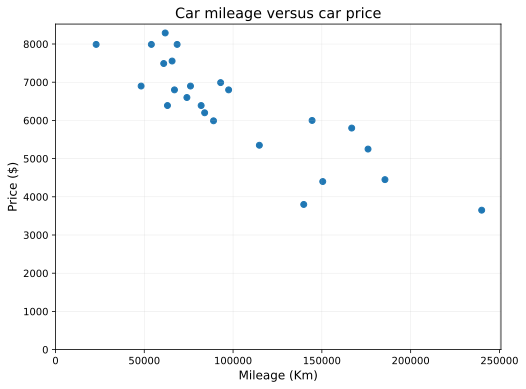

In [192]:
X = np.array([])
Y = np.array([])
with open("data.csv") as csv_file:
    csv_reader = csv.reader(csv_file)
    i = 0
    for row in csv_reader:
        if i != 0:
            X = np.append(X, float(row[0]))
            Y = np.append(Y, float(row[1]))
        i += 1
plt.scatter(X, Y)
plt.xlabel("Mileage (Km)")
plt.ylabel("Price ($)")
plt.title("Car mileage versus car price")
plt.xlim(0)
plt.ylim(0)
plt.show()


Initialize parameters.


In [193]:
theta_0 = 0.0
theta_1 = 0.0
learning_rate = 0.1
m = len(X)
epoch = 1000


Define our linear regression model.


In [194]:
def f(X):
    return theta_0 + theta_1 * X


Data Normalization.


In [195]:
maxX = max(X)
maxY = max(Y)
X = X / maxX
Y = Y / maxY


Define ploting function and plot normalized data.


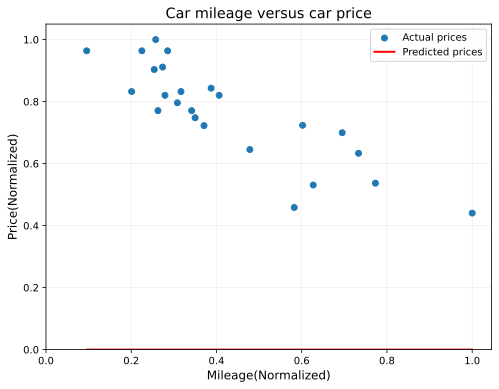

In [196]:
def plot_avp_prices(X, Y):
    plt.scatter(X, Y, label='Actual prices')
    plt.xlabel('Mileage(Normalized)')
    plt.ylabel('Price(Normalized)')
    plt.title('Car mileage versus car price')
    plt.plot(X, f(X), label='Predicted prices', color='r', lw=2)
    plt.xlim(0)
    plt.ylim(0)
    plt.legend()
    plt.show()


plot_avp_prices(X, Y)


Define the mean squared error (MSE) cost function.


In [197]:
def cost():
    return (1 / (2 * m)) * sum((f(X) - Y) ** 2)


Train the model using gradient descent algorithm.


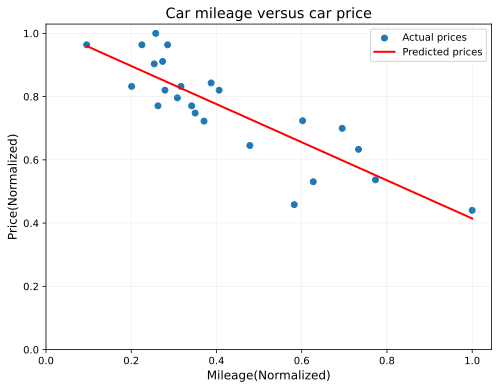

In [198]:
if epoch != 0:
    history = []
    history.append(cost())
while epoch > 0:
    tmp_theta_0 = (1 / m) * sum(f(X) - Y)
    tmp_theta_1 = (1 / m) * sum(X * (f(X) - Y))
    theta_0 -= learning_rate * tmp_theta_0
    theta_1 -= learning_rate * tmp_theta_1
    history.append(cost())
    epoch -= 1

plot_avp_prices(X, Y)


Adjust theta_0 and theta_1.


In [199]:
theta_0 *= maxY
theta_1 *= maxY / maxX

print(f'theta_0 = {theta_0}, theta_1 = {theta_1}')


theta_0 = 8433.895463712892, theta_1 = -0.02082418927299714


Display cost function values.


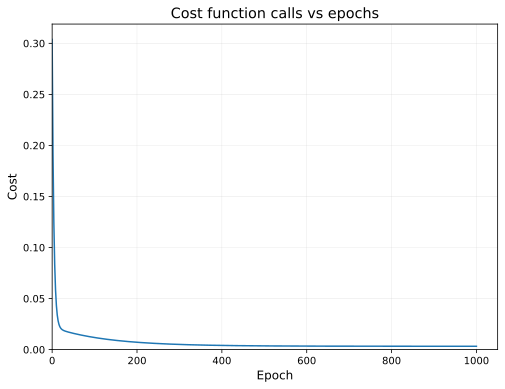

In [200]:
plt.plot(history)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.xlim(0)
plt.ylim(0)
plt.title("Cost function calls vs epochs")
plt.show()


Do some predictions.


In [201]:
print(f'Actual value: 3650,\tprediction: {f(240000)}')
print(f'Actual value: 4400,\tprediction: {f(150500)}')
print(f'Actual value: 6800,\tprediction: {f(67000)}')


Actual value: 3650,	prediction: 3436.090038193579
Actual value: 4400,	prediction: 5299.854978126823
Actual value: 6800,	prediction: 7038.674782422084
